In [1]:
import os
import numpy as np
import persistencecurves as pc
import matplotlib.pyplot as plt

from Bio.PDB import PDBParser
from ripser import ripser
from persim import wasserstein, plot_diagrams
from matplotlib import animation, rc
parser = PDBParser(PERMISSIVE=1, QUIET=True)

In [2]:
os.chdir('/home/longyuxi/Documents/protein-conformation-topology/data/morph_1cfd_1cm1')

In [3]:

lcs = np.empty((0, 300), int) # Use if computing H_0, H_1, and H_2

for i in range(1, 2):
    file = '1cfd_1cm1_' + '{0:02d}'.format(i) + '.pdb'
    structure = parser.get_structure(file, file)
    # Generate a list of the protein's atoms' R^3 coordinates
    coords = []
    for atom in structure.get_atoms():
        coords.append(list(atom.get_vector()))
    coords = np.array(coords)

    # ripser_output = ripser(coords, maxdim=3, thresh=10, do_cocycles=False)

    # Compute persistent homology
    print(f'Number of coordinates: {len(coords)}')
    diagram = ripser(coords, maxdim=2, thresh=10, do_cocycles=False)['dgms']


Number of coordinates: 1125


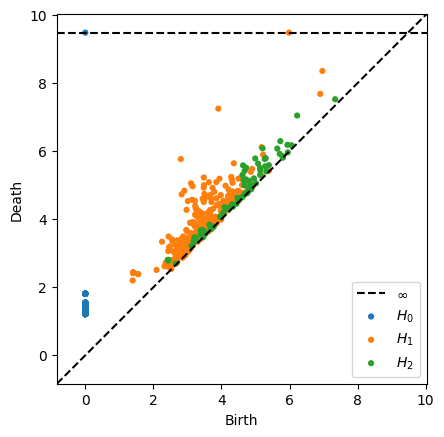

In [4]:
plot_diagrams(diagram)

In [5]:
for row in diagram:
    print(row.shape)

(1125, 2)
(290, 2)
(84, 2)


In [6]:
print(file)

1cfd_1cm1_01.pdb


Calculation for `1cfd_1cm1_01.pdb` with `maxdim=4`:

```
(1125, 2)
(290, 2)
(84, 2)
(1, 2)
(0, 2)
```

Took 10m40s.

`maxdim=3` took 50s.

*To-do* (not very important): justify that we don't need to calculate beyond 2